 Ahmed Elehwany | 260707540
 
 Muhammad Huzaifa Elahi | 260726386

# Dependencies

In [77]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy import sparse
import os
import statistics as stats
from timeit import default_timer as timer

# Design

## 1D Discrete Fourier Transform (naive)
Set of functions that performs the naive algorithm on a 1D input array and returns back a 1D output array of values after performing the transform.

dft_slow(x) / inverse_dft_slow(x): takes in input array x, applies the fourier transform/inverse tranform equation on each entry and returns an output array with updated entries.


In [78]:
def dft_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = x.copy()
    x = np.asarray(x, dtype=complex)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

def inverse_dft_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=complex)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = (1/N) * np.exp(2j * np.pi * k * n / N)
    return np.dot(M, x)

## 2D Discrete Fourier Transform (naive)
set of functions that take in a 2D matrix input and transforms it by calling the 1D naive algorithm functions on each row and column of the matrix. The output is a transformed 2D matrix.

dft2_slow(x) / inverse_dft2_slow(x): Takes in a 2D input matrix, performs 1D tranform operation by calling dft_slow(x) / inverse_dft_slow(x) on each row, then on each column. It then retuens an output matrix with updated values.

In [79]:
def dft2_slow(x):
    x = x.copy()
    x_trans = x.transpose()
    x_col_transformed = np.asarray(x_trans, dtype=complex)
    for n, col in enumerate(x_trans):
        x_col_transformed[n] = DFT_slow(col)
    x_col_transformed = x_col_transformed.transpose()
    x_transformed = np.asarray(x, dtype=complex)
    for m, row in enumerate(x_col_transformed):
        x_transformed[m] = DFT_slow(row)
    return x_transformed

def inverse_dft2_slow(x):
    x_trans = x.transpose()
    x_col_transformed = np.asarray(x_trans, dtype=complex)
    for n, col in enumerate(x_trans):
        x_col_transformed[n] = Inverse_DFT_slow(col)
    x_col_transformed = x_col_transformed.transpose()
    x_transformed = np.asarray(x, dtype=complex)
    for m, row in enumerate(x_col_transformed):
        x_transformed[m] = Inverse_DFT_slow(row)
    return x_transformed

## Cooley-Tukey FFT (fast)
Set of functions that perform fast fourier transform and inverse operations for 1D and 2D array inputs and returns back transformed output arrays after applying the algorithm.

For 1D fft and inverse_fft functions, we've split the single Discrete Fourier transform into two terms which themselves look very similar to smaller Discrete Fourier Transforms, one on the odd-numbered values, and one on the even-numbered values. As long as our smaller Fourier transforms have an even-valued N, we can reapply this divide-and-conquer approach, halving the computational cost each time, until our arrays are small enough that the strategy is no longer beneficial. Here in our design, we defined a stopping threshold of 32, where we fall back on our slow DFT algorithm to just get the value, when the size of the sub-problem becomes suitably small.

For 2D dft2_fast and inverse_dft2_fast, we follow the same logic as for naive 2D functions, except that we call the fast 1D fft and inverse_fft on each row and column of the matrix.

In [80]:
def fft(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=complex)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 32:  # this cutoff should be optimized
        return DFT_slow(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        X_even = np.concatenate([X_even, X_even])
        X_odd = np.concatenate([X_odd, X_odd])
        return X_even + factor * X_odd
    
def inverse_fft(x, norm=True):
    """A recursive implementation of the 1D Cooley-Tukey IFFT"""
    x = np.asarray(x, dtype=complex)
    N = x.shape[0]
    
    splitThreshold = 32
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= splitThreshold:  # this cutoff should be optimized
        return Inverse_DFT_slow(x)*N
    else:
        X_even = Inverse_FFT(x[::2], False)
        X_odd = Inverse_FFT(x[1::2], False)
        factor = np.exp(2j * np.pi * np.arange(N) / N)
        X_even = np.concatenate([X_even, X_even])
        X_odd = np.concatenate([X_odd, X_odd])
        x = X_even + factor * X_odd
        if norm==True:
            x = (1/N) * x
        return x
    
def dft2_fast(x):
    x = x.copy()
    x_trans = x.transpose()
    x_col_transformed = np.asarray(x_trans, dtype=complex)
    for n, col in enumerate(x_trans):
        x_col_transformed[n] = FFT(col)
    x_col_transformed = x_col_transformed.transpose()
    x_transformed = np.asarray(x, dtype=complex)
    for m, row in enumerate(x_col_transformed):
        x_transformed[m] = FFT(row)
    return x_transformed

def inverse_dft2_fast(x):
    x_trans = x.transpose()
    x_col_transformed = np.asarray(x_trans, dtype=complex)
    for n, col in enumerate(x_trans):
        x_col_transformed[n] = Inverse_FFT(col, True)
    x_col_transformed = x_col_transformed.transpose()
    x_transformed = np.asarray(x, dtype=complex)
    for m, row in enumerate(x_col_transformed):
        x_transformed[m] = Inverse_FFT(row, True)
    return x_transformed

# Testing

In this section, we test the correctness of our algorithms by comparing their output with the the corresponding built-in Numpy fourier functions.

In [81]:
"TEST #1"
x = np.random.random(1024)
np.allclose(FFT(x), np.fft.fft(x))

True

In [94]:
"TEST #2"
x = np.random.random(1024)
np.allclose(inverse_fft(x, True), np.fft.ifft(x))

True

In [83]:
"TEST #3"
np.allclose(dft2_slow(img), np.fft.fft2(img))

True

In [84]:
"TEST #4"
np.allclose(inverse_dft2_slow(img), np.fft.ifft2(img))

True

In [85]:
"TEST #5"
np.allclose(dft2_fast(img), np.fft.fft2(img))

True

In [86]:
"TEST #6"
np.allclose(inverse_dft2_fast(img), np.fft.ifft2(img))

True

# Analysis
 
We will now briefly derive and elaborate upon the runtimes for the 1-D & 2-D fast and naive  algorithms.

Note an assumption is made that # rows & # columns are equal, i.e N = M, so N will be the # elements in a 1-D array & N^2 will be the # elements in a 2-D array.


## 1-D Naive Algorithm 




The following is a 1-D Dicrete Time Fourier Transform:

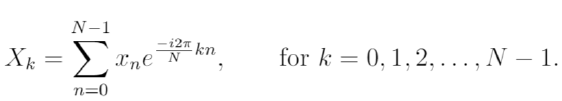

We can see that we perform a **linear scan** through all entries from 0 to N-1 to find a corresponding DTFT coefficient (X) for each entry (x) in the original 1-D structure. To solve this recurrence we need to look at the summation to derive a relationship for the number of computations run, this can trivially be seen to be N for 1 DTFT. However, to compute DTFT for each N, we perform N operations, N times. This means each 1-D DTFT can be said to have a runtime of N \* N i.e  **O(N^2)** . In our code we used a vectorized approach to compute the value using dot products.


## 2-D Naive Algorithm

For the 2-D algorithm, the following formula is used: 

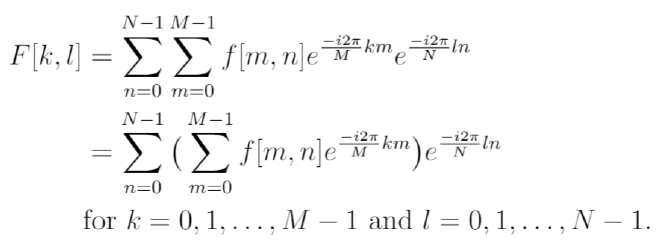

As we can see this computes the value by taking 1-D DTFT of the rows of the 2-D matrix of values f and that the outer sum is another 1-D DFT over the transformed rows performed along each column. The computation over 1 row is akin to simply applying the 1-D DTFT over a set of N entries which we've already show to be O(N^2). To expand this and involve the computations for the columns simply means taking N 1-D DTFTs essentially. This brings the runtime for the naive algorithm to N \* N^2, i.e **O(N^3)**


## 1-D Fast Algorithm

The following is the fast Cooley-Tuckey implementation for 1-D DTFT:

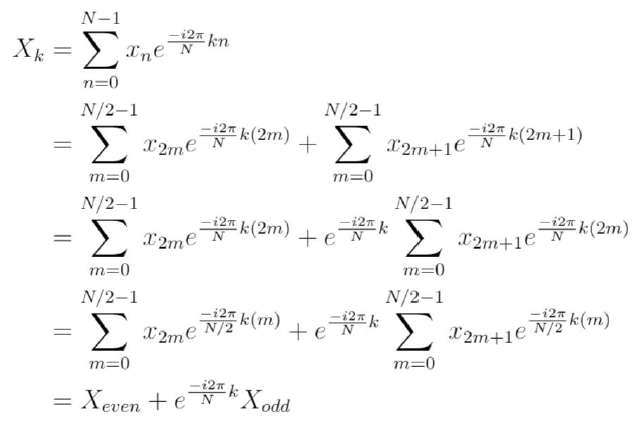

Here we split the sum in the even and odd indices which we sum separately and then put together.

We factor out a constant by reducing the exponent by one in the second term. 

This makes the coefficients the same for both sums so we can have them saved and precomputed in an array.

After simplifying further, the two terms are just a DFT of the even and odd indices which can be computed as separate problems and then consequently summed.

The algorithm works by successively splitting the problem in halves as many times as we want by just applying the same technique to the even and odd halves to split the problem to 4-subproblems, then 8, then 16 etc.

This algorithm's recurrence pattern is akin to that of merge sort. Knowing that, we can establish the recurrence:

T(N) =  c                if N = 1

''   =  2T(N/2) + cN     if N > 1

Solving the recurrence:

T(N) = 2T(N/2) + cN

''   = 2(2T(N/4)+ cN/2) + cN

''   =  .....

By noticing log(N) recurrences before we reach the base case of T(1) and by noticing n operations at each of these logn steps, the runtime is N \* logN, i.e **O(NlogN)** for the fast 1-D algorithm.

## 2-D Fast Algorithm

The fast algorithm across 2 Dimensions trivially applies the 1-D fast DTFTs to all rows & columns as previously discussed in the slow 2-D algorithm but the computation of the 1-D algoirthms in O(NlogN) instead of O(N^2) means our algorithm takes time N \* NlogN i.e O(N^2logN)





# Experiment

## Import and Resize Image

In [87]:
image_path = "./moonlanding.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE).astype(float)
width = len(img[0])
height = len(img)
width = width if width == 2**(int(np.log2(width))) else 2**(int(np.log2(width))+1)
height = height if height == 2**(int(np.log2(height))) else 2**int((np.log2(height))+1)
img = cv2.resize(img, (width, height))

## FFT Transform (Mode 1)
In this section, we test our 2D FFT algorithm by applying the transform to an image. We output the transformed FFT plot as log-scaled to improve visibility.

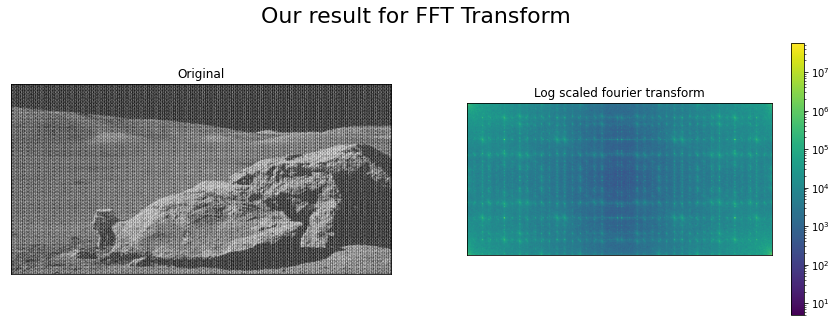

In [88]:
transformed = dft2_fast(img)

plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(img, cmap="gray")
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(np.abs(transformed), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title("Log scaled fourier transform"), plt.xticks([]), plt.yticks([])
plt.suptitle("Our result for FFT Transform",fontsize=22)
plt.show()

To test the accuracy and correctness of our algorithm, we compare our results with built-in Numpy FFT. We get an identical FFt log-scaled plot.

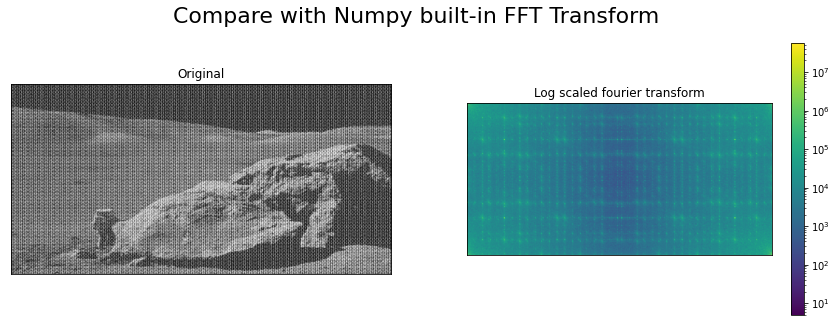

In [89]:
transformed = np.fft.fft2(img)

plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(img, cmap="gray")
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(np.abs(transformed), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title("Log scaled fourier transform"), plt.xticks([]), plt.yticks([])
plt.suptitle("Compare with Numpy built-in FFT Transform",fontsize=22)
plt.show()

##  Denoising (Mode 2)
In this section, we try to produce various denoised versions of the image. We got best results by removing high frequencies. The high frequencies lie in the middle of the plot, so our algoithm removes all the high frequencies in the middle. We did that by defining a frequency threshold, then we set all the higher frequencies to zero before inverting to get back the filtered original. After producing different denoised versions, we got best results using a percentage threshold of 8%. That means that we keep the highest and lowest 8% of the range and zero out all entries in the middle.

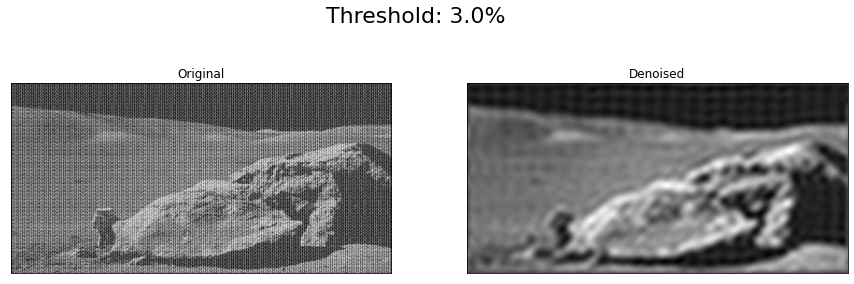

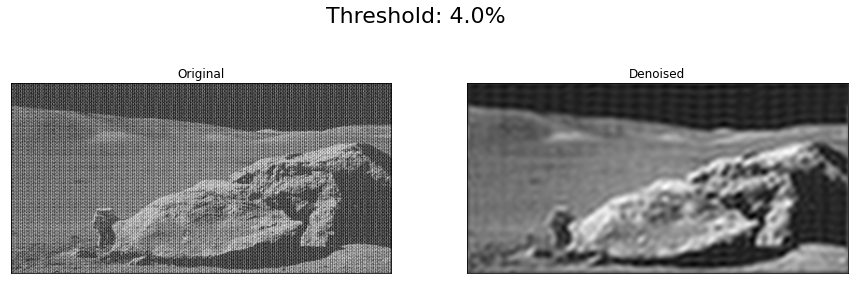

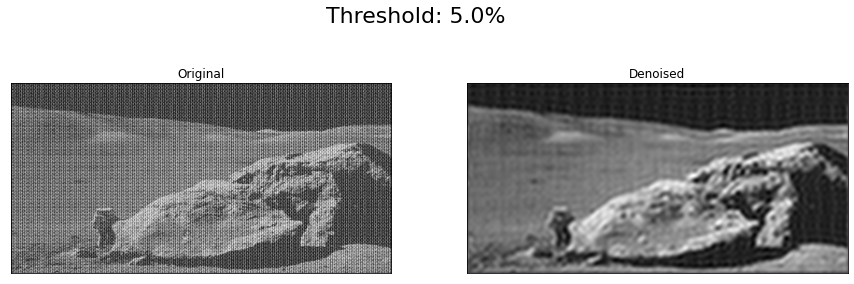

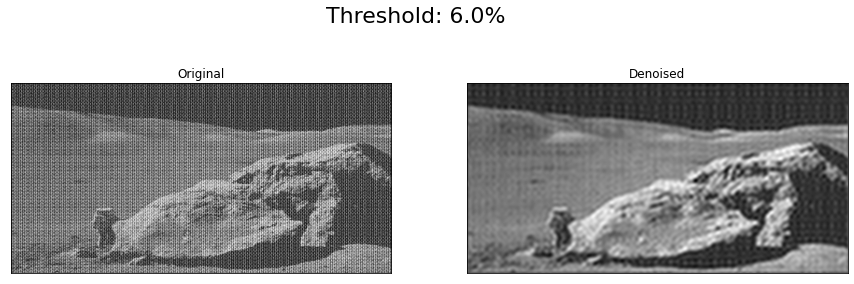

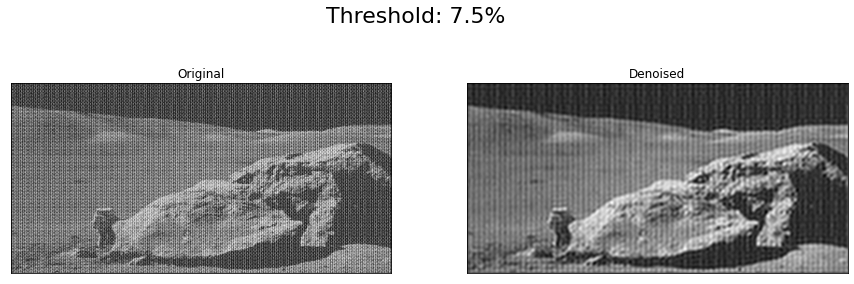

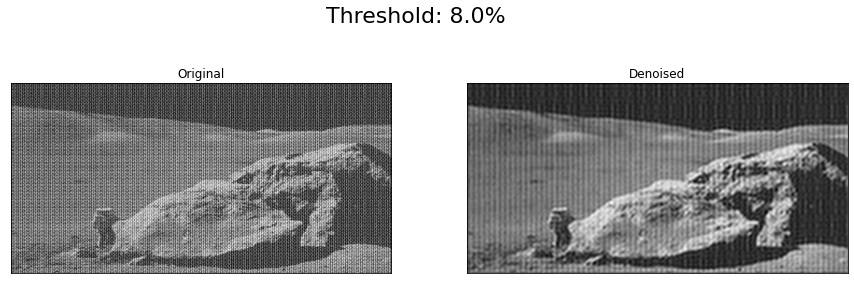

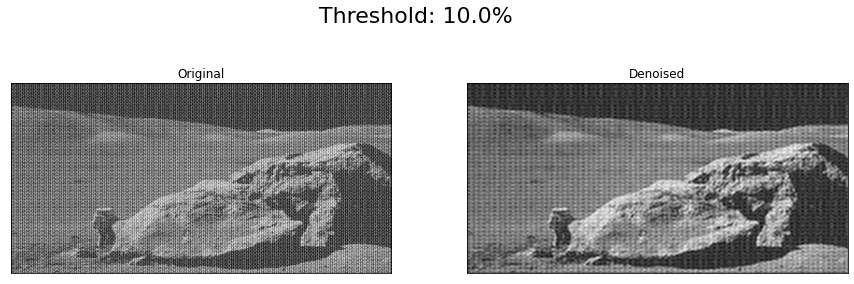

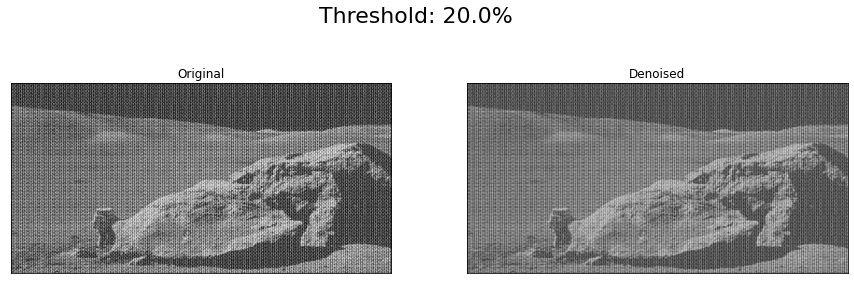

In [90]:
transformed_original = dft2_fast(img)

thresh_factors = [0.03, 0.04, 0.05, 0.06, 0.075, 0.08, 0.1, 0.2]
for keep_fraction in thresh_factors:
    transformed = transformed_original.copy()
    r, c = transformed.shape
    transformed[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
    transformed[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0  

    back =  inverse_dft2_fast(transformed).real
    plt.figure(figsize=(15,5))
    plt.subplot(121), plt.imshow(img, cmap="gray")
    plt.title("Original"), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(back, cmap="gray")
    plt.title("Denoised"), plt.xticks([]), plt.yticks([])
    plt.suptitle("Threshold: {}%".format(100*keep_fraction),fontsize=22)
    plt.show()

## Compression (Mode 3)
In this section, we produce 6 different compressed versions of an image. Compression is done by thresholding the coefficients’ magnitude and take only the largest percentile of them. Therefore, we assign zero to any point with fourier coefficient value smaller than the calculated threshold. We also notice that the percentage reduction in the size of the compressed files is linearly correlated to the percentage of the points we zero  out. At 30%, we notice the image is reconstructed with barely no quality loss. At 50%, we notice a very slight loss in the details. At 95%, even though most of the points were zeroed out, however the image still keeps most of its details, but we can notice the loss in quality.

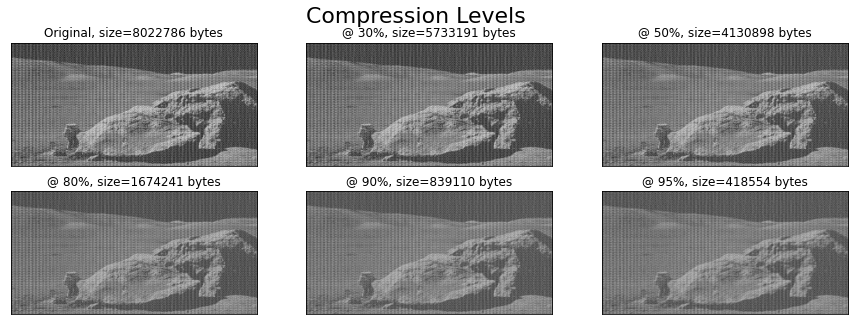

In [92]:
transformed_original = dft2_fast(img)
data_csr = sparse.csr_matrix(transformed_original)
sparse.save_npz("original.npz", data_csr)
size = os.path.getsize("original.npz")
plt.figure(figsize=(15,5))
plt.subplot(231), plt.imshow(img, cmap="gray")
plt.title("Original, size={} bytes".format(size)), plt.xticks([]), plt.yticks([])
compression_factors= [30, 50, 80, 90, 95]
index_count=2
for factor in compression_factors:
    transformed = transformed_original.copy()
    thresh = np.percentile(abs(transformed), factor)
    transformed[abs(transformed) < thresh] = 0
    data_csr = sparse.csr_matrix(transformed)
    fileName = "@{}%.npz".format(factor)
    sparse.save_npz(fileName, data_csr)
    size = os.path.getsize(fileName)
    back =  Inverse_DFT2_fast(transformed).real
    plt.subplot(2,3,index_count), plt.imshow(back, cmap="gray")
    plt.title("@ {}%, size={} bytes".format(factor, size)), plt.xticks([]), plt.yticks([])
    index_count=index_count+1
plt.suptitle("Compression Levels",fontsize=22)
plt.show()

## Runtime Analysis (Mode 4) 
Here we analyze the runtimes for the fast & slow algorithms for four different arrays.

The array dimensions range from (2^5, 2^5) to (2^8, 2^8).

Additional sample points WERE NOT included due to the massive increase in run time for the report to generate results, however during our own testing of sample points up to (2^10, 2^10), the trajectory shown here help up.

As we can see the slow & fast algorithms perform similarly at smaller sizes however at larger sizes, starting from array of size (2^7, 2^7), we notice a dramatic speed using the fast algorithm.

Please observe the graph plotted with error bars representing a confidence interval of 97%.

Note below the mean and varience for each array size for both algorithms.

==================  2^5 x 2^5  ==========================
================  Slow Algorithm ========================
2^5 x 2^5 : Slow Algorithm Mean:  0.0033988424450702346
2^5 x 2^5 : Slow Algorithm Variance:  1.258117358716155e-06
================  Fast Algorithm ========================
2^5 x 2^5 : Fast Algorithm Mean:  0.003311054669514609
2^5 x 2^5 : Fast Algorithm Variance:  2.894830753142899e-07

==================  2^6 x 2^6  ==========================
================  Slow Algorithm ========================
2^6 x 2^6 : Slow Algorithm Mean:  0.03223693744479937
2^6 x 2^6 : Slow Algorithm Variance:  0.0002613645777424151
================  Fast Algorithm ========================
2^6 x 2^6 : Fast Algorithm Mean:  0.020423735113581643
2^6 x 2^6 : Fast Algorithm Variance:  7.438126818485298e-05

==================  2^7 x 2^7  ==========================
================  Slow Algorithm ========================
2^7 x 2^7 : Slow Algorithm Mean:  0.16054881178004304
2^7 x 2^7 : Slow Alg

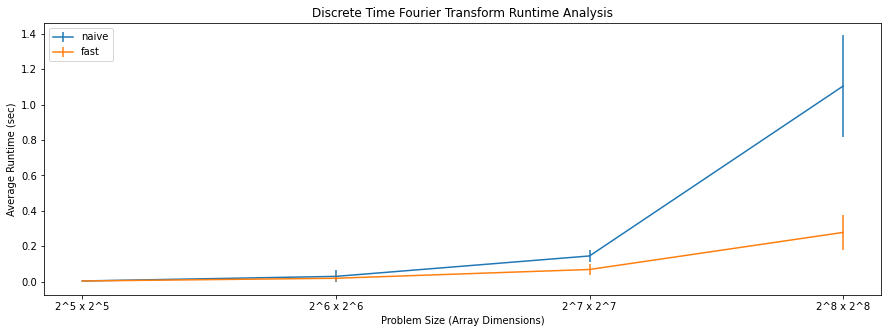

In [93]:
arr1 = np.random.random((2 ** 5, 2 ** 5))
arr2 = np.random.random((2 ** 6, 2 ** 6))
arr3 = np.random.random((2 ** 7, 2 ** 7))
arr4 = np.random.random((2 ** 8, 2 ** 8))
array_dict = {'2^5 x 2^5': arr1, '2^6 x 2^6': arr2, '2^7 x 2^7': arr3, '2^8 x 2^8': arr4}

plt.figure(figsize=(15, 5))
plt.title('Discrete Time Fourier Transform Runtime Analysis')
plt.xlabel('Problem Size (Array Dimensions)')
plt.ylabel('Average Runtime (sec)')

x_axis = ['2^5 x 2^5', '2^6 x 2^6', '2^7 x 2^7', '2^8 x 2^8']
y_axis_slow = []
y_axis_fast = []
confidence_interval_slow = []
confidence_interval_fast = []

# Measure Slow & Fast Algorithm, Take Avg of 10 Readings
for arr_name, arr in array_dict.items():
    slow_duration_readings = []
    fast_duration_readings = []
    for i in range(1, 10):
        # Slow Algorithm Timing
        start = timer()
        dft2_slow(arr)
        end = timer()
        slow_duration_readings.append(end - start)

        # Fast Algorithm Timing
        start = timer()
        dft2_fast(arr)
        end = timer()
        fast_duration_readings.append(end - start)

    print('================== ', arr_name, ' ==========================')

    print('================  Slow Algorithm ========================')
    avg_slow_duration = sum(slow_duration_readings) / 10
    y_axis_slow.append(avg_slow_duration)
    confidence_interval_slow.append(stats.stdev(slow_duration_readings) * 2)
    print(arr_name, ": Slow Algorithm Mean: ", np.mean(slow_duration_readings))
    print(arr_name, ": Slow Algorithm Variance: ", np.var(slow_duration_readings))

    print('================  Fast Algorithm ========================')
    avg_fast_duration = sum(fast_duration_readings) / 10
    y_axis_fast.append(avg_fast_duration)
    confidence_interval_fast.append(stats.stdev(fast_duration_readings) * 2)
    print(arr_name, ": Fast Algorithm Mean: ", np.mean(fast_duration_readings))
    print(arr_name, ": Fast Algorithm Variance: ", np.var(fast_duration_readings))
    print('=========================================================')
    print()

# Plot w/ Error Bars (Stdev * 2)
plt.errorbar(x=x_axis, y=y_axis_slow, yerr=confidence_interval_slow, label='naive')
plt.errorbar(x=x_axis, y=y_axis_fast, yerr=confidence_interval_fast, label='fast')
plt.legend(loc='upper left', numpoints=1)
plt.show()